In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [73]:
df=pd.read_csv("/content/Telco_Customer_Churn.csv")

In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
df.shape

(7043, 21)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [78]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [79]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [80]:
df[["tenure","SeniorCitizen","MonthlyCharges"]].describe()


,tenure,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692
std,24.559481,0.368612,30.090047
min,0.000000,0.000000,18.250000
25%,9.000000,0.000000,35.500000
50%,29.000000,0.000000,70.350000
75%,55.000000,0.000000,89.850000
max,72.000000,1.000000,118.750000


In [81]:
df.duplicated().sum()

np.int64(0)

In [82]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

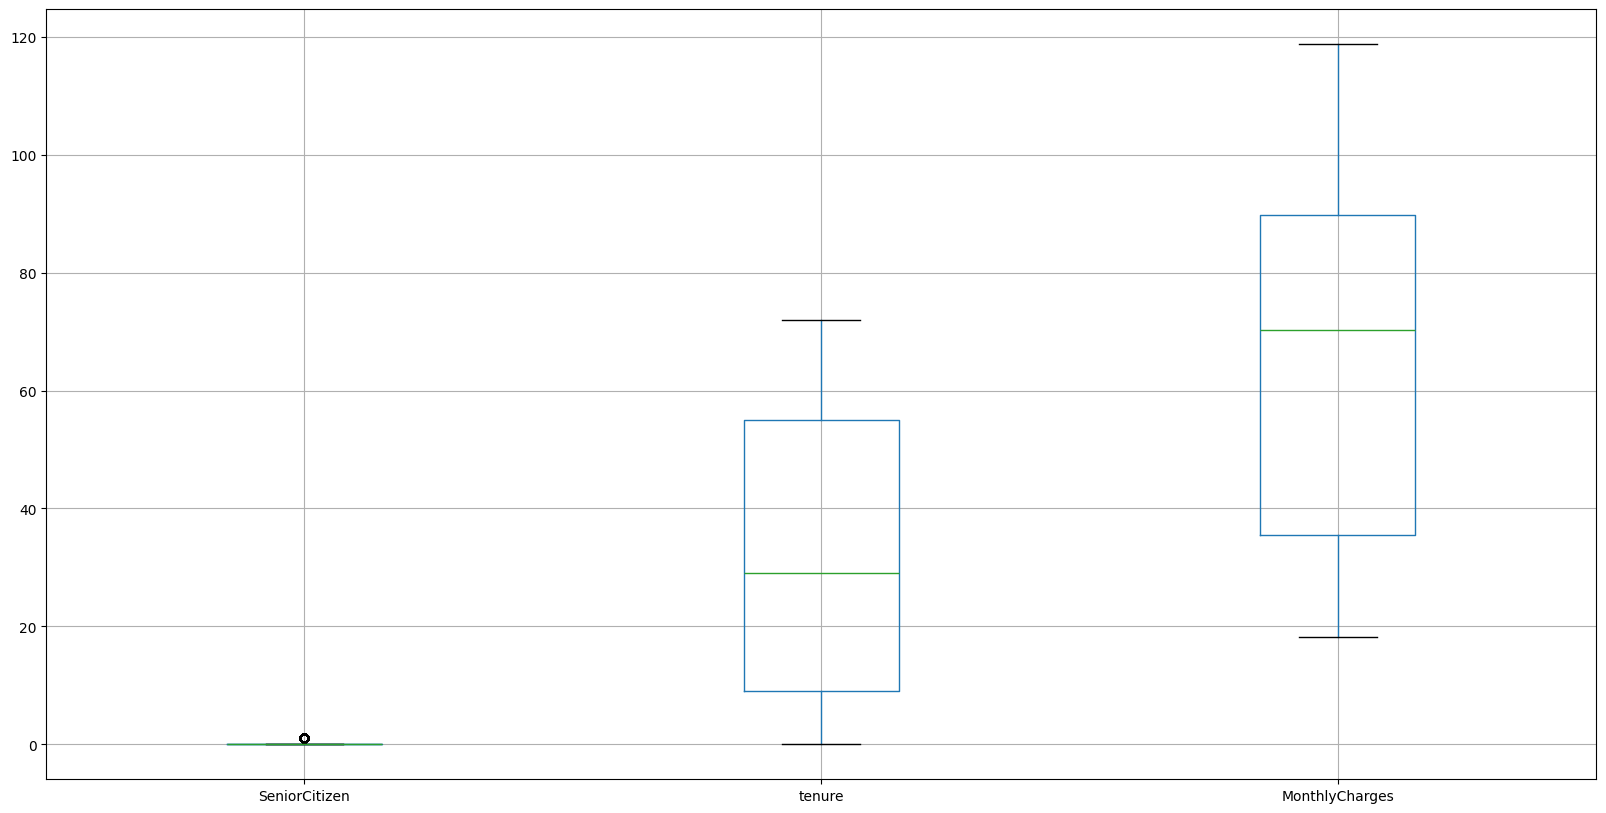

In [83]:
df.boxplot(figsize=(20, 10))
plt.show()

In [84]:
df.drop(['customerID'],axis=1,inplace=True)

In [85]:
y=df["Churn"]
X=df.drop(['Churn'],axis=1)

In [86]:
y.value_counts()

,count
Churn,
No,5174
Yes,1869


In [87]:

from imblearn.over_sampling import RandomOverSampler

In [88]:
ros = RandomOverSampler() #for balancing datasets by oversampling minority classes in classification tasks.

In [89]:
X,y = ros.fit_resample(X,y)

In [90]:
y.value_counts()

,count
Churn,
No,5174
Yes,5174


In [91]:
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [92]:
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


In [93]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    X[col] = encoder.fit_transform(X[col])

print(X)

       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0           0              0        1           0       1             0   
1           1              0        0           0      34             1   
2           1              0        0           0       2             1   
3           1              0        0           0      45             0   
4           0              0        0           0       2             1   
...       ...            ...      ...         ...     ...           ...   
10343       1              0        1           0       1             1   
10344       0              0        0           0       9             1   
10345       0              0        1           1       8             1   
10346       0              0        0           0       1             1   
10347       1              0        0           0       1             0   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                  1        

In [94]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
from sklearn.preprocessing import StandardScaler
num_cols = ['tenure', 'MonthlyCharges']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc = RandomForestClassifier(random_state=42)

In [99]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [100]:
y_pred=rfc.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [102]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8947


In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.93      0.85      0.89      1021
         Yes       0.86      0.94      0.90      1049

    accuracy                           0.89      2070
   macro avg       0.90      0.89      0.89      2070
weighted avg       0.90      0.89      0.89      2070



In [71]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_random = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)

print('Accuracy of RandomForest Classifier:', accuracy_score(y_test, y_pred))
print("Classification Report After Tuning:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Accuracy of RandomForest Classifier: 0.8927536231884058
Classification Report After Tuning:
               precision    recall  f1-score   support

          No       0.93      0.84      0.89      1021
         Yes       0.86      0.94      0.90      1049

    accuracy                           0.89      2070
   macro avg       0.90      0.89      0.89      2070
weighted avg       0.90      0.89      0.89      2070

